<center>
<img src="https://benefits.fastfive.co.kr/wp-content/uploads/2017/12/logo_%ED%8C%A8%EC%8A%A4%ED%8A%B8%EC%BA%A0%ED%8D%BC%EC%8A%A4-600x500.png" width="300" height="300"><br>
</center>

파이썬을 활용한 이커머스 데이터분석_강의를 듣고 따라했던 코딩과 요점을 정리하였다.
 - 출처: [fast campus](https://fastcampus.co.kr/?gclid=CjwKCAjwqvyFBhB7EiwAER786a4FhRzvL9JiiOOTS5TL22ZuXVUKWvF6wWni06h-6fIZ5tp1j0J5phoCoHMQAvD_BwE)




# Chapter.07 고객 분류 (Kmeans)

## 분석의 목적


- Kmeans Clustering을 활용하여, 데이터 기반의 고객 Segment 분류

- 쇼핑몰 고객 데이터

배우기 앞서, 예제를 다뤄본다. kmeans에서 y값은 없는 값이지만 이 예제에서는 y를 넣어서 학습해본다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
make_blobs(n_samples = 200, n_features = 200, centers = 4, random_state = 100)

(array([[  1.20060988,  -4.11602225,  -1.73066167, ...,   7.17588741,
          -6.60857575,  -1.91594874],
        [  1.77915078,  -4.24786567,  -2.30132999, ...,   6.02667345,
          -5.45367431,  -3.46164153],
        [  0.70237751,  -4.95952703,  -0.70912414, ...,   8.19837411,
          -6.84799295,  -1.53790267],
        ...,
        [ -2.11081239,   4.13898664,  -1.84492092, ..., -11.10319888,
           1.13777799,  -0.18317904],
        [  0.72859818,  -4.66721381,  -2.93532096, ...,   8.8968047 ,
          -6.49876746,  -2.37012576],
        [  0.75919257,  -3.29741063,  -0.49985464, ...,   7.87040714,
          -4.46642633,  -4.41132106]]),
 array([0, 0, 0, 3, 2, 2, 3, 3, 2, 0, 3, 1, 3, 3, 2, 3, 3, 3, 1, 0, 3, 1,
        3, 2, 0, 3, 1, 1, 0, 2, 0, 3, 1, 0, 0, 0, 0, 0, 3, 2, 2, 1, 1, 2,
        3, 2, 3, 3, 2, 2, 2, 1, 1, 0, 2, 3, 3, 0, 0, 3, 2, 2, 1, 1, 1, 1,
        3, 3, 0, 1, 3, 1, 3, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 3, 3, 2, 2, 3,
        0, 3, 2, 2, 1, 3, 0, 2, 1, 2, 1, 

In [4]:
data = make_blobs(n_samples = 200, n_features = 2, centers = 4, random_state = 100)

In [5]:
data

(array([[-1.04541152e+01, -7.62125255e+00],
        [-1.00696483e+01, -6.35203699e+00],
        [-9.72925240e+00, -8.44434843e+00],
        [-9.53601173e+00, -8.04924975e+00],
        [-3.00736857e+00,  5.70163667e+00],
        [-1.00825197e+01, -7.06157008e+00],
        [ 1.48356884e+00,  6.54127044e+00],
        [ 1.36630977e+00,  7.30084118e+00],
        [-6.15050479e-01,  7.65521577e+00],
        [-2.13385599e-01,  7.84779827e+00],
        [ 3.36818459e-01, -3.40287961e+00],
        [-1.37722038e+00,  6.91773657e+00],
        [-1.08726796e+00,  5.80147972e+00],
        [-1.63584937e+00,  8.88579630e+00],
        [-7.62592530e-01,  7.32519908e+00],
        [-1.93336328e+00,  5.70953908e+00],
        [-9.51418426e+00, -7.24137223e+00],
        [-9.86650380e-01,  6.87917724e+00],
        [-9.37825374e+00, -7.94292047e+00],
        [ 2.66345400e-01,  7.40859703e+00],
        [-1.20385333e+01, -6.80941325e+00],
        [-9.20343837e+00, -8.85252239e+00],
        [ 4.10071850e-01, -3.997

인덱싱 하기

In [6]:
data[0]

array([[-1.04541152e+01, -7.62125255e+00],
       [-1.00696483e+01, -6.35203699e+00],
       [-9.72925240e+00, -8.44434843e+00],
       [-9.53601173e+00, -8.04924975e+00],
       [-3.00736857e+00,  5.70163667e+00],
       [-1.00825197e+01, -7.06157008e+00],
       [ 1.48356884e+00,  6.54127044e+00],
       [ 1.36630977e+00,  7.30084118e+00],
       [-6.15050479e-01,  7.65521577e+00],
       [-2.13385599e-01,  7.84779827e+00],
       [ 3.36818459e-01, -3.40287961e+00],
       [-1.37722038e+00,  6.91773657e+00],
       [-1.08726796e+00,  5.80147972e+00],
       [-1.63584937e+00,  8.88579630e+00],
       [-7.62592530e-01,  7.32519908e+00],
       [-1.93336328e+00,  5.70953908e+00],
       [-9.51418426e+00, -7.24137223e+00],
       [-9.86650380e-01,  6.87917724e+00],
       [-9.37825374e+00, -7.94292047e+00],
       [ 2.66345400e-01,  7.40859703e+00],
       [-1.20385333e+01, -6.80941325e+00],
       [-9.20343837e+00, -8.85252239e+00],
       [ 4.10071850e-01, -3.99744881e+00],
       [ 2.

In [7]:
data[1]

array([2, 2, 2, 2, 1, 2, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       0, 3, 0, 0, 1, 2, 1, 0, 0, 3, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 3,
       0, 3, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 3, 3, 3, 2, 0, 3, 2, 3,
       1, 2, 3, 2, 3, 1, 3, 2, 3, 2, 0, 3, 3, 2, 3, 0, 2, 2, 0, 3, 1, 0,
       1, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 2, 3, 1, 0, 3, 1, 1, 0, 0, 3, 1,
       1, 0, 3, 1, 3, 0, 1, 3, 2, 2, 2, 3, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0,
       0, 3, 0, 2, 1, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 2, 0, 2,
       2, 0, 1, 1, 3, 1, 3, 3, 3, 1, 2, 3, 2, 0, 0, 1, 3, 1, 3, 1, 0, 1,
       1, 3, 2, 2, 3, 3, 1, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 2, 0, 1, 1, 2,
       3, 0])

In [8]:
data[0][:,0]

array([-1.04541152e+01, -1.00696483e+01, -9.72925240e+00, -9.53601173e+00,
       -3.00736857e+00, -1.00825197e+01,  1.48356884e+00,  1.36630977e+00,
       -6.15050479e-01, -2.13385599e-01,  3.36818459e-01, -1.37722038e+00,
       -1.08726796e+00, -1.63584937e+00, -7.62592530e-01, -1.93336328e+00,
       -9.51418426e+00, -9.86650380e-01, -9.37825374e+00,  2.66345400e-01,
       -1.20385333e+01, -9.20343837e+00,  4.10071850e-01,  2.25174587e+00,
        7.92075370e-01,  5.41860777e-01, -7.56585997e-01, -8.95266345e+00,
       -1.68442974e+00,  1.48113772e+00,  8.75413399e-01,  3.00989843e+00,
        9.76962304e-01, -9.94328955e+00, -9.79380030e+00, -1.37939973e+00,
       -2.10521664e+00,  4.29963213e-01, -1.01724010e+01, -1.40787241e+00,
       -8.86329013e+00, -1.17867375e+01,  2.70003492e+00,  3.74018799e+00,
        9.76970826e-01,  3.53853432e+00, -1.36995537e-02, -2.21406638e+00,
        1.54081964e+00, -9.78801442e+00, -9.88043097e+00,  1.44867217e+00,
       -1.04422633e+01,  

In [9]:
data[0][0]

array([-10.45411516,  -7.62125255])

컬럼단위로 인덱싱 하기

In [10]:
data[0][:, 0]

array([-1.04541152e+01, -1.00696483e+01, -9.72925240e+00, -9.53601173e+00,
       -3.00736857e+00, -1.00825197e+01,  1.48356884e+00,  1.36630977e+00,
       -6.15050479e-01, -2.13385599e-01,  3.36818459e-01, -1.37722038e+00,
       -1.08726796e+00, -1.63584937e+00, -7.62592530e-01, -1.93336328e+00,
       -9.51418426e+00, -9.86650380e-01, -9.37825374e+00,  2.66345400e-01,
       -1.20385333e+01, -9.20343837e+00,  4.10071850e-01,  2.25174587e+00,
        7.92075370e-01,  5.41860777e-01, -7.56585997e-01, -8.95266345e+00,
       -1.68442974e+00,  1.48113772e+00,  8.75413399e-01,  3.00989843e+00,
        9.76962304e-01, -9.94328955e+00, -9.79380030e+00, -1.37939973e+00,
       -2.10521664e+00,  4.29963213e-01, -1.01724010e+01, -1.40787241e+00,
       -8.86329013e+00, -1.17867375e+01,  2.70003492e+00,  3.74018799e+00,
        9.76970826e-01,  3.53853432e+00, -1.36995537e-02, -2.21406638e+00,
        1.54081964e+00, -9.78801442e+00, -9.88043097e+00,  1.44867217e+00,
       -1.04422633e+01,  

<AxesSubplot:>

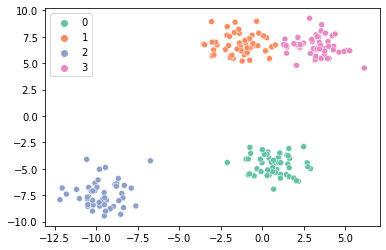

In [11]:
sns.scatterplot( x = data[0][:, 0], y = data[0][:, 1], hue = data[1], palette = 'Set2')

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters = 4)

In [14]:
model.fit(data[0])

KMeans(n_clusters=4)

In [15]:
model.labels_

array([2, 2, 2, 2, 3, 2, 0, 0, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2,
       1, 0, 1, 1, 3, 2, 3, 1, 1, 0, 1, 2, 2, 3, 1, 1, 2, 3, 2, 2, 1, 0,
       1, 0, 1, 3, 1, 2, 2, 1, 2, 1, 2, 1, 1, 3, 0, 0, 0, 2, 1, 0, 2, 0,
       3, 2, 0, 2, 0, 3, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 1, 0, 3, 1,
       3, 1, 0, 2, 3, 1, 2, 2, 1, 0, 3, 2, 0, 3, 1, 0, 3, 3, 1, 1, 0, 3,
       3, 1, 0, 3, 0, 1, 3, 0, 2, 2, 2, 0, 1, 2, 2, 1, 3, 1, 3, 3, 3, 1,
       1, 0, 1, 2, 3, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 3, 0, 3, 0, 2, 1, 2,
       2, 1, 3, 3, 0, 3, 0, 0, 0, 3, 2, 0, 2, 1, 1, 3, 0, 3, 0, 3, 1, 3,
       3, 0, 2, 2, 0, 0, 3, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 3, 3, 2,
       0, 1], dtype=int32)

In [16]:
data[1]

array([2, 2, 2, 2, 1, 2, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       0, 3, 0, 0, 1, 2, 1, 0, 0, 3, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 3,
       0, 3, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 3, 3, 3, 2, 0, 3, 2, 3,
       1, 2, 3, 2, 3, 1, 3, 2, 3, 2, 0, 3, 3, 2, 3, 0, 2, 2, 0, 3, 1, 0,
       1, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 2, 3, 1, 0, 3, 1, 1, 0, 0, 3, 1,
       1, 0, 3, 1, 3, 0, 1, 3, 2, 2, 2, 3, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0,
       0, 3, 0, 2, 1, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 2, 0, 2,
       2, 0, 1, 1, 3, 1, 3, 3, 3, 1, 2, 3, 2, 0, 0, 1, 3, 1, 3, 1, 0, 1,
       1, 3, 2, 2, 3, 3, 1, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 2, 0, 1, 1, 2,
       3, 0])

답안지

<AxesSubplot:>

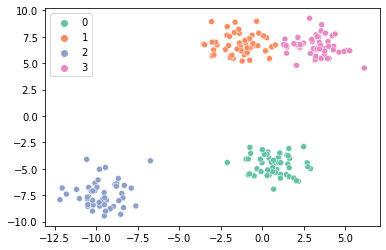

In [17]:
sns.scatterplot( x = data[0][:, 0], y = data[0][:, 1], hue = data[1], palette = 'Set2')

<AxesSubplot:>

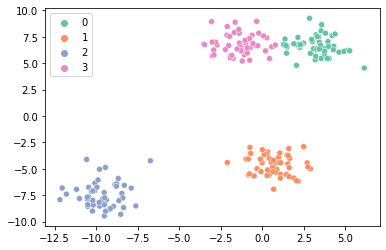

In [18]:
sns.scatterplot( x = data[0][:, 0], y = data[0][:, 1], hue = model.labels_ , palette = 'Set2')

n_clusters 값을 3으로 조정하여 3그룹으로 만들기

In [19]:
model = KMeans(n_clusters = 3)


In [20]:
model.fit(data[0])

KMeans(n_clusters=3)

<AxesSubplot:>

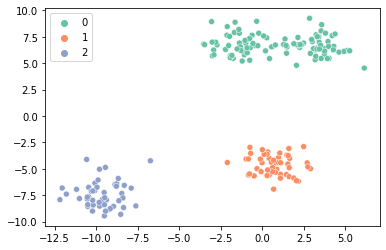

In [21]:
sns.scatterplot( x = data[0][:, 0], y = data[0][:, 1], hue = model.labels_ , palette = 'Set2')

5 그룹으로 만들기

<AxesSubplot:>

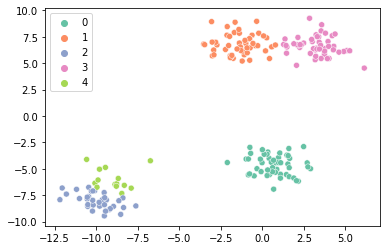

In [22]:
model = KMeans(n_clusters = 5)
model.fit(data[0])
sns.scatterplot( x = data[0][:, 0], y = data[0][:, 1], hue = model.labels_ , palette = 'Set2')

In [23]:
model.inertia_

377.0923630431555

n_clusters의 수치에 관해 distance 거리 확인하기. for 문을 통해 2~ 10 까지 ..

In [24]:
distance = []
for i in range(2,11):
    model = KMeans(n_clusters = i)
    model.fit(data[0])
    distance.append(model.inertia_)

In [25]:
distance

[3855.3908583820526,
 967.5329197924485,
 428.6910143243812,
 377.0923630431555,
 333.0919199257052,
 302.838248252247,
 271.9107332802928,
 239.1770373968992,
 214.00356496738334]

그래프를 그려서 가장 좋은 clusters 를 확인해 보자.

<AxesSubplot:>

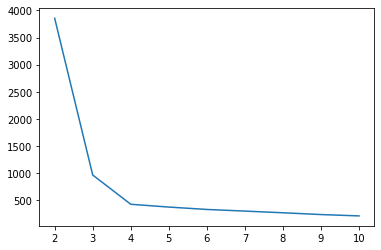

In [26]:
sns.lineplot(x = list(range(2,11)), y = distance)

4 일때가 최적의 지점이다. Elbow Plot

이제 실전 예제를 다루어 보자.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data 를 불러오자. 그리고 CustomerID는 중요하지 않은 data 임으로 index_col 을 사용하자.

In [28]:
data = pd.read_csv('./data/Mall_Customers.csv',  index_col = 0)

In [29]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [31]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


결측치는 없다.

하지만 Gneder 컬럼은 더미 함수를 사용해서 텍스트 데이터를 숫자 데이터로 바꿔주자.

In [32]:
pd.get_dummies(data, columns=['Gender'], drop_first = True)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [33]:
data = pd.get_dummies(data, columns=['Gender'], drop_first = True)

In [34]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


이제 data가 잘 정리 되었다. KMeans 를 실행해보자.

In [35]:
from sklearn.cluster import KMeans

In [36]:
model = KMeans(n_clusters = 3)

In [37]:
model.fit(data)

KMeans(n_clusters=3)

In [38]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

data를 result_df 로 하나 복사 해둔다.

In [39]:
result_df = data.copy()

In [40]:
result_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [41]:
result_df['label'] = model.labels_

In [42]:
result_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,0
3,20,16,6,0,0
4,23,16,77,0,0
5,31,17,40,0,0
...,...,...,...,...,...
196,35,120,79,0,2
197,45,126,28,0,1
198,32,126,74,1,2


In [43]:
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,40.325203,44.154472,49.829268,0.406504
1,40.394737,87.000000,18.631579,0.526316
2,32.692308,86.538462,82.128205,0.461538


In [44]:
result_df['label'].value_counts()

0    123
2     39
1     38
Name: label, dtype: int64

In [45]:
distance = []

for i in range(2,11):
    model = KMeans(n_clusters = i)
    model.fit(data)
    distance.append(model.inertia_)

In [46]:
distance

[212889.44245524294,
 143391.59236035674,
 104422.83498539752,
 75528.58656469136,
 58348.64136331504,
 51165.184237107904,
 44357.32664902663,
 40891.680830865036,
 37509.97941426389]

<AxesSubplot:>

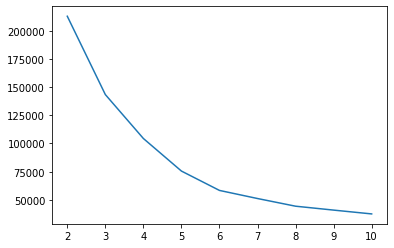

In [47]:
sns.lineplot( x=list(range(2,11)), y = distance)

이번에는  Elbow Plot 으로 판단하기 어려운 그림이 나타났다. 그래서 다른 방법으로 최적의 k 값 찾기를 해보려 한다.

실루엣 스코어

In [48]:
from sklearn.metrics import silhouette_score

In [49]:
silhouette_score(data, model.labels_)

0.3787177701012805

In [50]:
sil = []

for i in range(2,11):
    model = KMeans(n_clusters = i)
    model.fit(data)
    sil.append(silhouette_score(data, model.labels_))

In [51]:
sil

[0.29307334005502633,
 0.383798873822341,
 0.4052954330641215,
 0.4440669204743008,
 0.45205475380756527,
 0.4409411333609709,
 0.4304396746257457,
 0.41642911077666755,
 0.40064258067585135]

<AxesSubplot:>

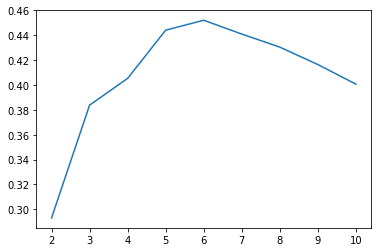

In [52]:
sns.lineplot(x = list(range(2,11)), y = sil)

silhouette_score 의 경우, k 값이 클수록 좋은 수치이다. 그리고 클러스터가 무작정 늘어난다고 해서 개선되지 않는다.
   
- 따라서 클러스터 값은 6이 가장 좋은 수치를 나타남을 확인 했다.

In [53]:
model = KMeans(n_clusters = 6)

In [54]:
model.fit(data)

KMeans(n_clusters=6)

In [55]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [56]:
data['label'] = model.labels_

In [57]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,2
2,21,15,81,1,4
3,20,16,6,0,2
4,23,16,77,0,4
5,31,17,40,0,2
...,...,...,...,...,...
196,35,120,79,0,3
197,45,126,28,0,1
198,32,126,74,1,3


In [58]:
data.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,27.000000,56.657895,49.131579,0.342105
1,41.685714,88.228571,17.285714,0.571429
2,44.142857,25.142857,19.523810,0.380952
3,32.692308,86.538462,82.128205,0.461538
4,25.272727,25.727273,79.363636,0.409091
5,56.155556,53.377778,49.088889,0.444444


<AxesSubplot:xlabel='label', ylabel='Age'>

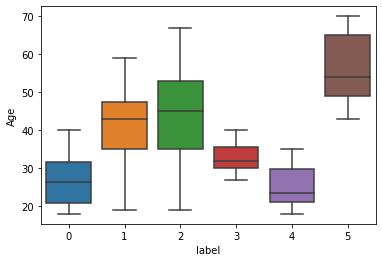

In [59]:
sns.boxplot(x = 'label', y = 'Age', data = data)      

<AxesSubplot:xlabel='label', ylabel='Annual Income (k$)'>

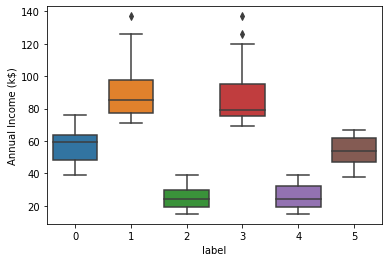

In [60]:
sns.boxplot(x = 'label', y = 'Annual Income (k$)', data = data)

<AxesSubplot:xlabel='label', ylabel='Spending Score (1-100)'>

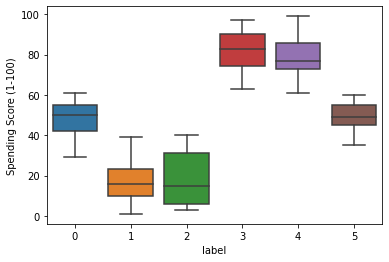

In [61]:
sns.boxplot(x = 'label', y = 'Spending Score (1-100)', data = data)     

- 여기서 상식밖의 인사이트한 결과가 하나 보인다.
    - 0 번 레이블과 , 3 번 레이블을 보면, 연령은 비슷하다. 연간 소득은 0 번 레이블이 3번 레이블 보다 높다. 그래서 구매력 또한 같은 경향일 것으로 예상했으나 반대의 경향이 나타났다.

### PCA 주성분 분석

In [62]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,2
2,21,15,81,1,4
3,20,16,6,0,2
4,23,16,77,0,4
5,31,17,40,0,2
...,...,...,...,...,...
196,35,120,79,0,3
197,45,126,28,0,1
198,32,126,74,1,3


label은 영향을 줄 수 있으므로, 드랍시킨다.

In [63]:
data.drop('label', axis = 1, inplace = True)

In [64]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components = 2) # 컬럼을 2개로

In [74]:
pca.fit(data)

PCA(n_components=2)

In [75]:
pca.transform(data)

array([[-3.18699448e+01, -3.30012521e+01],
       [ 7.64494048e-01, -5.68429006e+01],
       [-5.74082757e+01, -1.31249607e+01],
       [-2.16854252e+00, -5.34785900e+01],
       [-3.21740846e+01, -3.03884119e+01],
       [-2.17695183e+00, -5.22272685e+01],
       [-5.90656895e+01, -9.54376302e+00],
       [ 1.23708622e+01, -6.16180208e+01],
       [-6.63157690e+01, -3.21423160e+00],
       [-5.65556212e+00, -4.72672225e+01],
       [-5.82365979e+01, -9.13418751e+00],
       [ 1.46218043e+01, -6.21075685e+01],
       [-5.51608374e+01, -1.00799251e+01],
       [-3.02878331e-03, -5.01140754e+01],
       [-5.27646657e+01, -1.16807468e+01],
       [ 1.94661180e+00, -5.15222086e+01],
       [-3.45055496e+01, -2.37615402e+01],
       [-7.30493262e+00, -4.35151138e+01],
       [-4.12573070e+01, -1.64734737e+01],
       [ 1.61902860e+01, -5.83001207e+01],
       [-3.27400141e+01, -2.13347966e+01],
       [-9.81885245e-01, -4.44524038e+01],
       [-5.78100898e+01, -1.87057486e+00],
       [-1.

In [76]:
pca_df = pca.transform(data)

넘파이 어레이로 나온 것을 데이터 프레임으로 보기좋게 바꾸자.

In [77]:
pd.DataFrame(pca_df)

,0,1
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


컬럼이름을 넣어주자.

In [78]:
pd.DataFrame(pca_df, columns=['PC1', 'PC2'])

,PC1,PC2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


In [80]:
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])

In [83]:
pca_df

,PC1,PC2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


컬럼을 pca을 통해 2개로 줄였으니, scatter 로 그래프를 그려보자. 컬럼이 4개에서 2개로 줄었음으로 원래의 각 정보보다는 정보력이 떨어졌을 것이다. 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

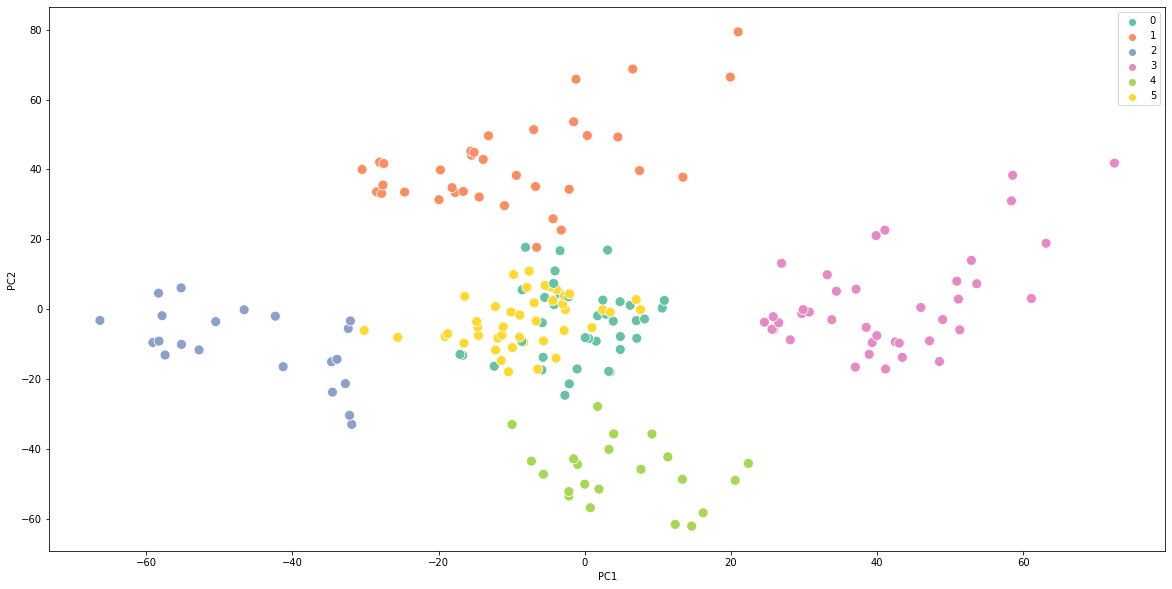

In [89]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = pca_df['PC1'], y = pca_df['PC2'], hue = model.labels_, palette = 'Set2', s = 100)

pca로 전처리한것을 시각화로 살펴보았다. 하지만 이것은 왜곡된 정보가 있었기 때문에 좋은 모델이라고는 볼 수 없다. 참고용으로 보자

    - KMeans Cluster 에 대해 알아보았고, 최적의 k 값을 구하는 방법도 알아보았다. 그렇게해서 나온 결과를 어떤식으로 해석할 수 있는지 알아보았다.
    - KMeans Cluster을 하면, 데이터기반으로 가장 특색이 뚜렷한 비슷한 무리들끼리 묶이기 때문에 좀 더 많은 인사이트를 얻을 수 있다.

- 출처 : 파이썬을 활용한 이커머스 데이터 분석